In [1]:
import math
#Параметры волокна
w = 4.75e-6 #Радиус поля моды
b = 4e-6#HРадиус сердцевины
NA = 0.13#Числовая апертура
Ner = 3.7e25
sigma12S = 3.198e-25
sigma12P = 2.245e-25
#Параметры для сигнала
Gs = 1 - math.exp(-(2 * b**2) / (w**2))
#Параметры для накачки
Vp = math.pi * 2 * b * NA / (980e-9)
wp = b * (0.65 + 1.65/((Vp)**1.5) + 2.879/((Vp)**6))
Gp = 1 - math.exp(-(2 * b**2) / (wp**2))
print("Фактор перекрытия для сигнала:",Gs)
print("Фактор перекрытия для накачки:",Gp)

Фактор перекрытия для сигнала: 0.7578704943075776
Фактор перекрытия для накачки: 0.904332059766793


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.optimize import root_scalar

# Константы
# Константы
t21 = 10e-3
h = 6.6e-34
Aeff = 3.14 * (2e-6)**2
Gp = 0.904
Gs = 0.76
C = 3e8
hs = 1550e-9
hp = 980e-9
Ner = 3.7e25
alphap = 0.006
alphas = 0.0
l = 2
dhs = 0.16e-9
sigma12S = 3.198e-25
sigma21S = 4.4e-25
sigma12P = 2.245e-25
sigma21P = 0.0
z0 = 0
Z = 100
H = l / Z
zzz = np.linspace(z0, l, Z)
R1 = 0.9
R2 = 0.1 # Выход
epsilon = 1e-6  # Точность для вычислений
Pp = float(input("Введите начальную мощность накачки Pp0: "))
# Функции для расчета изменений концентраций и мощностей
def dN2(z, N2, N1, Pp, Ps):
    return Gp * hp / (h * C * Aeff ) * (sigma12P * N1 - sigma21P * N2) * Pp + Gs * hs / (h * C * Aeff) * \
           (sigma12S * N1 - sigma21S * N2) * Ps - N2 / t21
def dN1(z, N2, N1, Pp, Ps):
    return -(Gp * hp / (h * C * Aeff ) * (sigma12P * N1 - sigma21P * N2) * Pp + Gs * hs / (h * C * Aeff) * \
            (sigma12S * N1 - sigma21S * N2) * Ps - N2 / t21)
def dPp(z, N2, N1, Pp):
    return Gp * (sigma21P * N2 - sigma12P * N1) * Pp - alphap * Pp
def dPs(z, N2, N1, Ps):
    return Gs * (sigma21S * N2 - sigma12S * N1) * Ps - alphas * Ps + 2 * sigma21S * N2 * h * C**2 * dhs / (hs**3)
# Объединяем функции в одну для использования в solve_ivp
def system(z, y):
    N2, N1, Pp, Ps = y
    return np.array([dN2(z, N2, N1, Pp, Ps), dN1(z, N2, N1, Pp, Ps), dPp(z, N2, N1, Pp), dPs(z, N2, N1, Ps)])
# Функция для вычисления ошибки
def objective(x):
    sol = solve_ivp(system, [0, l], [0.0, Ner, Pp, x])
    Psl = sol.y[3, -1]  # Signal power at z = L
    return Psl * R2 - x  # Условие для метода секущих
# Используем встроенную функцию root_scalar
result = root_scalar(objective, method='secant', x0=0.001, x1=0.01, xtol=epsilon)
# Получаем решение
if result.converged:
    print(f"Решение найдено: x = {result.root}")
else:
    print("Метод секущих не сошелся")

Введите начальную мощность накачки Pp0:  20e-3


ValueError: could not convert string to float: '{"dataframes": [], "user": "Orange"}'

In [ ]:
L=10м;R1=0.9;R2=0.1
N21, Pp1, Ps1 = propa(40e-3, 3.208086391185886e-29)
N22, Pp2, Ps2 = propa(60e-3, 2.1544922165904095e-09)
N23, Pp3, Ps3 = propa(80e-3, 0.0013669717430985248)
N24, Pp4, Ps4 = propa(100e-3, 0.0027695682341707167)
N25, Pp5, Ps5 = propa(120e-3, 0.004171839781486758)
N26, Pp6, Ps6 = propa(20e-3, 8.048860470035915e-43)
N27, Pp7, Ps7 = propa(140e-3, 0.005574004456026105)
N28, Pp8, Ps8 = propa(160e-3, 0.006976118612009812)
L=2м;R1=0.9;R2=0.1
N21, Pp1, Ps1 = propa(40e-3, 0.0021737981138380325)
N22, Pp2, Ps2 = propa(60e-3, 0.0035752965877948717)
N23, Pp3, Ps3 = propa(80e-3, 0.00497679174920878658)
N24, Pp4, Ps4 = propa(100e-3, 0.006378292757220914)
N25, Pp5, Ps5 = propa(120e-3, 0.007779792109207754)
N26, Pp6, Ps6 = propa(20e-3, 0.0007723294099809499)
N27, Pp7, Ps7 = propa(140e-3, 0.009181296269286609)
N28, Pp8, Ps8 = propa(160e-3, 0.010582793827929243)

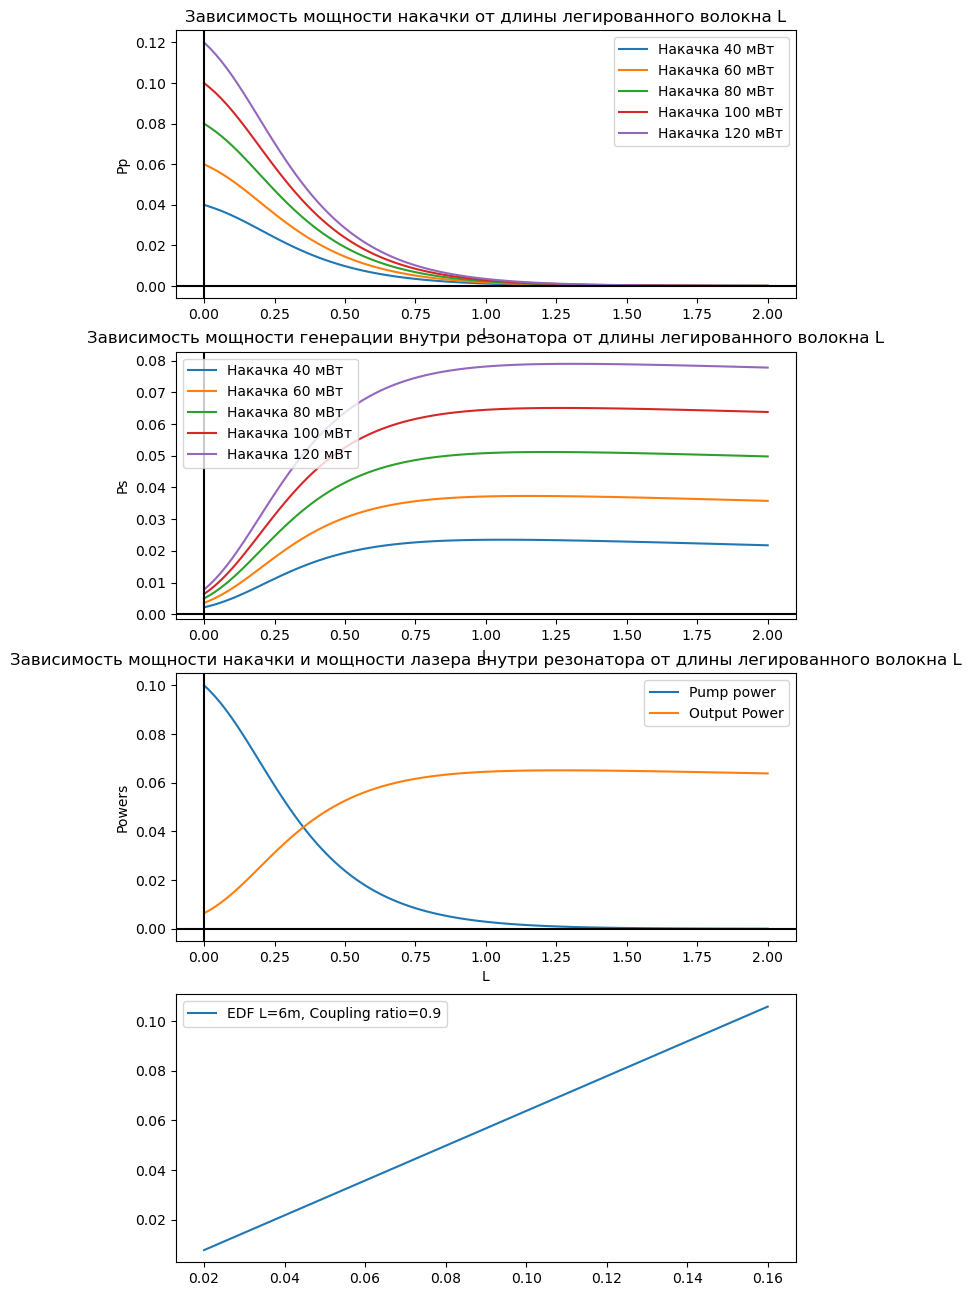

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.integrate import solve_ivp
# Константы
t21 = 10e-3
h = 6.6e-34
Aeff = 3.14 * (2e-6)**2
Gp = 0.904
Gs = 0.76
C = 3e8
hs = 1550e-9
hp = 980e-9
Ner = 3.7e25
alphap = 0.006
alphas = 0.0
l = 2
dhs = 0.16e-9
sigma12S = 3.198e-25
sigma21S = 4.4e-25
sigma12P = 2.245e-25
sigma21P = 0.0
z0 = 0
Z = 100
H = l / Z
z = np.linspace(z0, l, Z)
# Функции для расчета изменений концентраций и мощностей
def dN2(z, N2, Pp, Ps):
    return Gp * hp / (h * C * Aeff ) * (sigma12P * (Ner - N2) - sigma21P * N2) * Pp + Gs * hs / (h * C * Aeff) * \
           (sigma12S * (Ner  - N2) - sigma21S * N2) * Ps - N2 / t21
def dPp(z, N2, Pp):
    return Gp * (sigma21P * N2 - sigma12P * (Ner - N2)) * Pp - alphap * Pp
def dPs(z, N2, Ps):
    return Gs * (sigma21S * N2 - sigma12S * (Ner  - N2)) * Ps - alphas * Ps + 2 * sigma21S * N2 * h * C**2 * dhs / (hs**3)
# Объединяем функции в одну для использования в solve_ivp
def system(t, y):
    N2, Pp, Ps = y
    return [dN2(t, N2, Pp, Ps), dPp(t, N2, Pp), dPs(t, N2, Ps)]
# Функция для численного решения системы ОДУ методом Рунге-Кутты 4-го порядка
def propa(Pp0, Ps0):
    # Начальные условия
    N20 = 0.0
    # Решение системы дифференциальных уравнений методом Рунге-Кутта четвертого порядка
    sol = solve_ivp(system, [z0, l], [N20, Pp0, Ps0], method='RK45', max_step=H)
    # Получение решений
    N2 = sol.y[0]
    Pp = sol.y[1]
    Ps = sol.y[2]
    # Интерполяция решений на сетку z
    N2_interp = np.interp(z, sol.t, N2)
    Pp_interp = np.interp(z, sol.t, Pp)
    Ps_interp = np.interp(z, sol.t, Ps) 
    return N2_interp, Pp_interp, Ps_interp
# Вызов функции и получение результатов
N21, Pp1, Ps1 = propa(40e-3, 0.0021737981138380325)
N22, Pp2, Ps2 = propa(60e-3, 0.0035752965877948717)
N23, Pp3, Ps3 = propa(80e-3, 0.00497679174920878658)
N24, Pp4, Ps4 = propa(100e-3, 0.006378292757220914)
N25, Pp5, Ps5 = propa(120e-3, 0.007779792109207754)
N26, Pp6, Ps6 = propa(20e-3, 0.0007723294099809499)
N27, Pp7, Ps7 = propa(140e-3, 0.009181296269286609)
N28, Pp8, Ps8 = propa(160e-3, 0.010582793827929243)
# Вывод графика зависимости мощности сигнала накачки от координаты z
fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(8, 16))
axs[0].plot(z, Pp1, label ='Накачка 40 мВт')
axs[0].plot(z, Pp2, label ='Накачка 60 мВт')
axs[0].plot(z, Pp3, label ='Накачка 80 мВт')
axs[0].plot(z, Pp4, label ='Накачка 100 мВт')
axs[0].plot(z, Pp5, label ='Накачка 120 мВт')
axs[0].axhline(y=0, color='k', linestyle='-')
axs[0].axvline(x=0, color='k', linestyle='-')
axs[0].set_title("Зависимость мощности накачки от длины легированного волокна L")
axs[0].set_xlabel("L")
axs[0].set_ylabel("Pp")
#axs[1].set_xlim([z0,20])
axs[1].plot(z, Ps1, label ='Накачка 40 мВт')
axs[1].plot(z, Ps2, label ='Накачка 60 мВт')
axs[1].plot(z, Ps3, label ='Накачка 80 мВт')
axs[1].plot(z, Ps4, label ='Накачка 100 мВт')
axs[1].plot(z, Ps5, label ='Накачка 120 мВт')
axs[1].axhline(y=0, color='k', linestyle='-')
axs[1].axvline(x=0, color='k', linestyle='-')
#axs[1].axvline(x=15, color='k', linestyle='-')
axs[1].set_title("Зависимость мощности генерации внутри резонатора от длины легированного волокна L")
axs[1].set_xlabel("L")
axs[1].set_ylabel("Ps")
axs[2].plot(z, Pp4, label ='Pump power')
axs[2].plot(z, Ps4, label ='Output Power')
axs[2].set_xlabel("L")
axs[2].set_ylabel("Powers")
axs[2].axhline(y=0, color='k', linestyle='-')
axs[2].axvline(x=0, color='k', linestyle='-')
axs[2].set_title("Зависимость мощности накачки и мощности лазера внутри резонатора от длины легированного волокна L")
PP = np.array([Pp6[0], Pp1[0], Pp2[0], Pp3[0], Pp4[0], Pp5[0], Pp7[0], Pp8[0]])
PS = np.array([Ps6[-1],Ps1[-1], Ps2[-1], Ps3[-1], Ps4[-1], Ps5[-1], Ps7[-1], Ps8[-1]])
axs[3].plot(PP, PS, label ='EDF L=6m, Coupling ratio=0.9')
axs[0].legend()
axs[1].legend()
axs[2].legend()
axs[3].legend()
plt.show()